In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import time

# Классная работа

## Полиномиальная Регрессия

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [ ]:
X = pd.DataFrame(data.x)
y = data.y

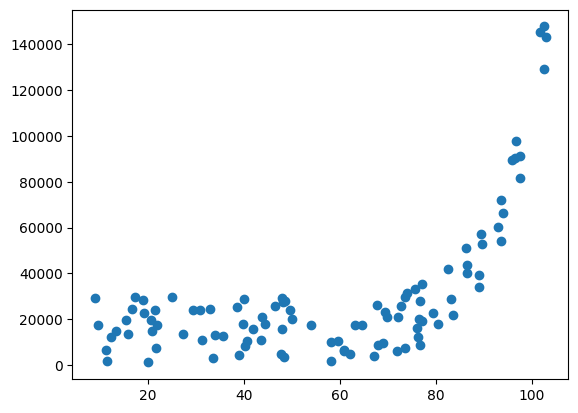

In [ ]:
plt.scatter(X, y)
plt.show()

In [ ]:
linear = LinearRegression().fit(X,y)

In [ ]:
xx = pd.DataFrame(np.linspace(min(X.x), max(X.x), 100))
yy = linear.predict(xx)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


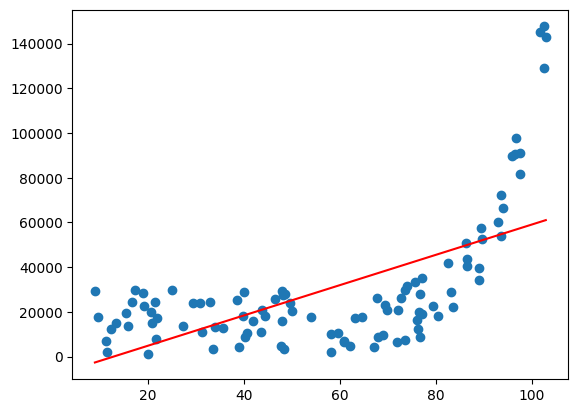

In [ ]:
plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')
plt.show()

In [ ]:
lin_score = linear.score(X, y)
lin_score

0.37467360318911636

In [ ]:
transformation = PolynomialFeatures(degree=2)

In [ ]:
transformation.fit(X,y)

PolynomialFeatures()

In [ ]:
X_2 = transformation.transform(X)
X_2.shape, X_2[:5]

((100, 3),
 array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03],
        [1.00000000e+00, 4.80028921e+01, 2.30427765e+03],
        [1.00000000e+00, 4.79397558e+01, 2.29822018e+03],
        [1.00000000e+00, 4.78090258e+01, 2.28570295e+03],
        [1.00000000e+00, 6.97844271e+01, 4.86986627e+03]]))

In [ ]:
poly_2d = LinearRegression().fit(X_2, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


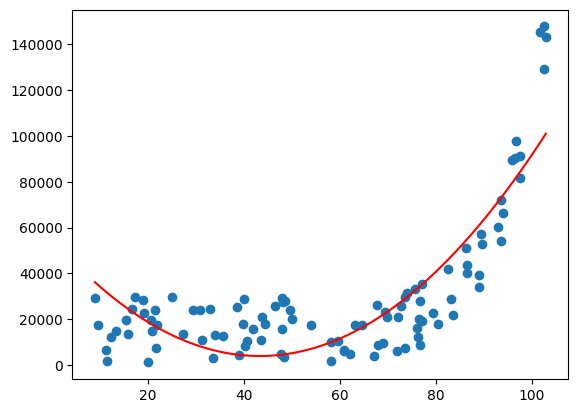

In [ ]:
xx_2d = transformation.transform(xx)
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [ ]:
poly_2d = poly_2d.score(X_2, y)
poly_2d

0.7359753787024842

## Классификация

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
data.head()

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


In [ ]:
y = data.y
X = data.drop(["y"], axis=1)

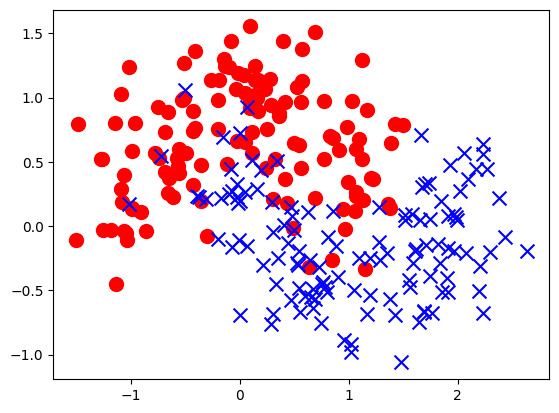

In [ ]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker='o', c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker='x', c='b', s=100)
plt.show()

In [ ]:
logistic = LogisticRegression().fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


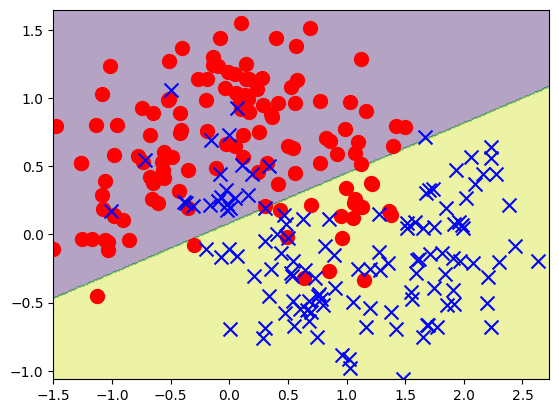

In [ ]:
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
log_score = logistic.score(X, y)
log_score

0.832

In [ ]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

In [ ]:
X_3.shape, X_3[:5]

((250, 9),
 array([[ 4.82885400e-02,  2.67592140e-01,  2.33178309e-03,
          1.29216338e-02,  7.16055536e-02,  1.12598401e-04,
          6.23966829e-04,  3.45772764e-03,  1.91610834e-02],
        [ 1.36315053e+00,  1.71122525e-01,  1.85817938e+00,
          2.33265761e-01,  2.92829185e-02,  2.53297821e+00,
          3.17976347e-01,  3.99170260e-02,  5.01096696e-03],
        [-4.24253357e-01,  8.93937129e-01,  1.79990911e-01,
         -3.79255828e-01,  7.99123591e-01, -7.63617484e-02,
          1.60900558e-01, -3.39030866e-01,  7.14366249e-01],
        [ 1.12344209e-01,  5.65671502e-01,  1.26212213e-02,
          6.35499174e-02,  3.19984248e-01,  1.41792112e-03,
          7.13946521e-03,  3.59483772e-02,  1.81005970e-01],
        [-1.26245252e+00,  5.21735313e-01,  1.59378635e+00,
         -6.58666059e-01,  2.72207737e-01, -2.01207959e+00,
          8.31534623e-01, -3.43649343e-01,  1.42020389e-01]]))

In [ ]:
class_3 = LogisticRegression().fit(X_3, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


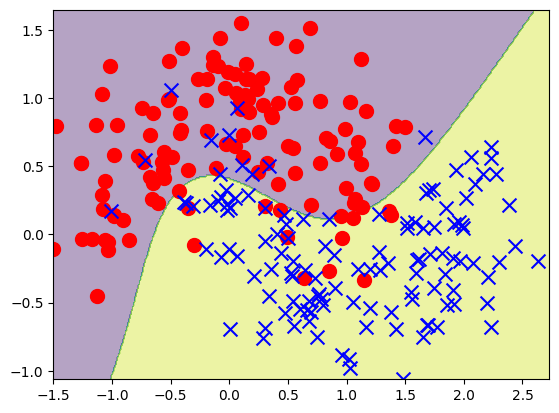

In [ ]:
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [ ]:
log_score3 = class_3.score(X_3, y)
log_score3

0.9

## Реальный датасет

In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

NameError: ignored

In [ ]:
data_kc_prices.head()

NameError: ignored

In [ ]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [ ]:
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [ ]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc = reg_kc_multiple.score(X_kc_prices, y_kc_prices)
reg_kc

0.699747189010915

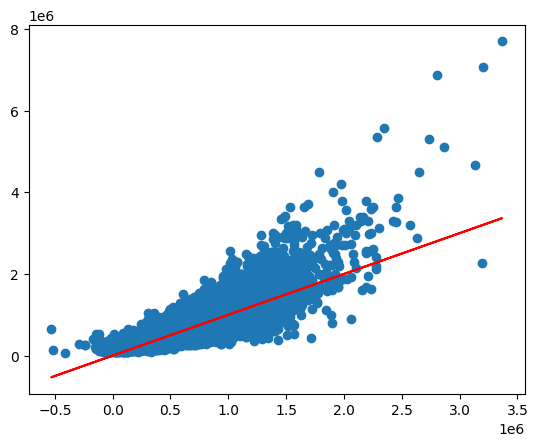

In [ ]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()

In [ ]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)

In [ ]:
X_3_kc_prices.shape

(21613, 1330)

In [ ]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
kc2_score = reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)
kc2_score

0.8650781867438108

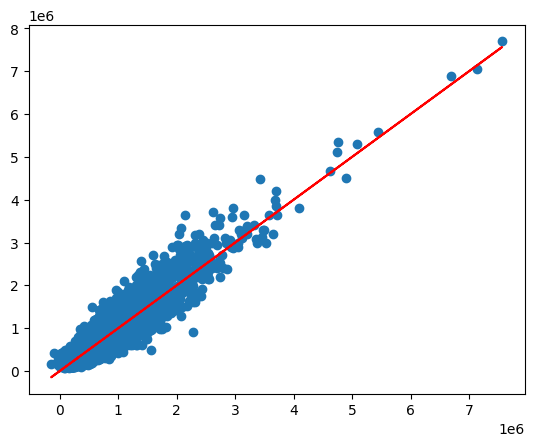

In [ ]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')
plt.show()

# Задачи для самостоятельного выполнения

## 1. В выполненной работе добавьте замер времени обучения каждой модели.

In [ ]:
start = time.time()
linear = LinearRegression().fit(X,y)
time_lin = time.time()-start
print(f'Время обучения линейной решрессии = {time_lin}')

Время обучения линейной решрессии = 0.010590076446533203


In [ ]:
start = time.time()
poly_2d = LinearRegression().fit(X_2, y)
time_pol2 = time.time()-start
print(f'Время обучения полиномиальной линейной решрессии = {time_pol2}')

Время обучения полиномиальной линейной решрессии = 0.022528648376464844


In [ ]:
start = time.time()
logistic = LogisticRegression().fit(X, y)
time_log = time.time()-start
print(f'Время обучения логистической линейной решрессии = {time_log}')

Время обучения логистической линейной решрессии = 0.010448694229125977


In [ ]:
start = time.time()
class_3 = LogisticRegression().fit(X_3, y)
time_pol_log = time.time()-start
print(f'Время обучения логистической полиномиальной решрессии = {time_pol_log}')

Время обучения логистической полиномиальной решрессии = 0.010789155960083008


In [ ]:
start = time.time()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
time_mult = time.time()-start
print(f'Время обучения линейной решрессии на реальном датасете = {time_mult}')

Время обучения линейной решрессии на реальном датасете = 0.018997669219970703


In [ ]:
start = time.time()
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
time_kc_price = time.time()-start
print(f'Время обучения полиномиальной решрессии на реальном датасете = {time.time()-start}')

Время обучения полиномиальной решрессии на реальном датасете = 0.21705937385559082


## 2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


In [ ]:
X = pd.DataFrame(data.x)
y = data.y

In [ ]:
linear = LinearRegression().fit(X,y)

In [ ]:
xx = pd.DataFrame(np.linspace(min(X.x), max(X.x), 100))
yy = linear.predict(xx)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
transformation = PolynomialFeatures(degree=5)

In [ ]:
transformation.fit(X,y)

PolynomialFeatures(degree=5)

In [ ]:
X_5 = transformation.transform(X)
X_5.shape, X_5[:5]

((100, 6),
 array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03, 9.01366562e+05,
         8.70700093e+07, 8.41076964e+09],
        [1.00000000e+00, 4.80028921e+01, 2.30427765e+03, 1.10611992e+05,
         5.30969551e+06, 2.54880741e+08],
        [1.00000000e+00, 4.79397558e+01, 2.29822018e+03, 1.10176114e+05,
         5.28181602e+06, 2.53208970e+08],
        [1.00000000e+00, 4.78090258e+01, 2.28570295e+03, 1.09277231e+05,
         5.22443797e+06, 2.49775290e+08],
        [1.00000000e+00, 6.97844271e+01, 4.86986627e+03, 3.39840828e+05,
         2.37155975e+07, 1.65497938e+09]]))

In [ ]:
start = time.time()
poly_5d = LinearRegression().fit(X_5, y)
time_poly_5d = time.time() - start

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


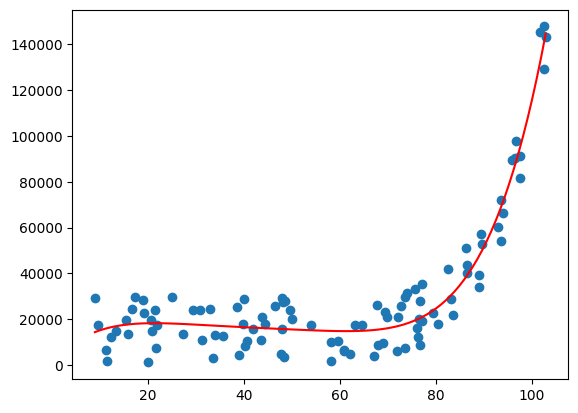

In [ ]:
xx_5d = transformation.transform(xx)
yy_5d = poly_5d.predict(xx_5d)
plt.scatter(X.x, y)
plt.plot(xx, yy_5d, c='r')

In [ ]:
score_5 =poly_5d.score(X_5, y)
score_5

0.9217478060447024

In [ ]:
transformation = PolynomialFeatures(degree=10)

In [ ]:
transformation.fit(X,y)

PolynomialFeatures(degree=10)

In [ ]:
X_10 = transformation.transform(X)
X_10.shape, X_10[:5]

((100, 11),
 array([[1.00000000e+00, 9.65977805e+01, 9.33113119e+03, 9.01366562e+05,
         8.70700093e+07, 8.41076964e+09, 8.12461679e+11, 7.84819949e+13,
         7.58118651e+15, 7.32325791e+17, 7.07410459e+19],
        [1.00000000e+00, 4.80028921e+01, 2.30427765e+03, 1.10611992e+05,
         5.30969551e+06, 2.54880741e+08, 1.22350127e+10, 5.87315995e+11,
         2.81928664e+13, 1.35333912e+15, 6.49641920e+16],
        [1.00000000e+00, 4.79397558e+01, 2.29822018e+03, 1.10176114e+05,
         5.28181602e+06, 2.53208970e+08, 1.21387762e+10, 5.81929966e+11,
         2.78975804e+13, 1.33740319e+15, 6.41147824e+16],
        [1.00000000e+00, 4.78090258e+01, 2.28570295e+03, 1.09277231e+05,
         5.22443797e+06, 2.49775290e+08, 1.19415133e+10, 5.70912117e+11,
         2.72947521e+13, 1.30493551e+15, 6.23876955e+16],
        [1.00000000e+00, 6.97844271e+01, 4.86986627e+03, 3.39840828e+05,
         2.37155975e+07, 1.65497938e+09, 1.15491788e+11, 8.05952827e+12,
         5.62429563e+14, 3

In [ ]:
start = time.time()
poly_10d = LinearRegression().fit(X_10, y)
time_poly_10d = time.time() - start

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


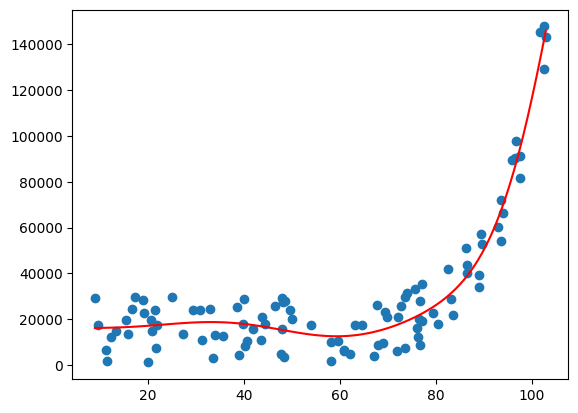

In [ ]:
xx_10d = transformation.transform(xx)
yy_10d = poly_10d.predict(xx_10d)
plt.scatter(X.x, y)
plt.plot(xx, yy_10d, c='r')

In [ ]:
score_10 =poly_10d.score(X_10, y)
score_10

0.9232002062571606

In [ ]:
transformation = PolynomialFeatures(degree=100)

In [ ]:
transformation.fit(X,y)

PolynomialFeatures(degree=100)

In [ ]:
X_100 = transformation.transform(X)
X_100.shape, X_100[:5]

((100, 101),
 array([[1.00000000e+000, 9.65977805e+001, 9.33113119e+003,
         9.01366562e+005, 8.70700093e+007, 8.41076964e+009,
         8.12461679e+011, 7.84819949e+013, 7.58118651e+015,
         7.32325791e+017, 7.07410459e+019, 6.83342802e+021,
         6.60093980e+023, 6.37636134e+025, 6.15942353e+027,
         5.94986641e+029, 5.74743890e+031, 5.55189841e+033,
         5.36301063e+035, 5.18054924e+037, 5.00429558e+039,
         4.83403846e+041, 4.66957386e+043, 4.51070470e+045,
         4.35724063e+047, 4.20899773e+049, 4.06579839e+051,
         3.92747100e+053, 3.79384982e+055, 3.66477472e+057,
         3.54009103e+059, 3.41964937e+061, 3.30330539e+063,
         3.19091969e+065, 3.08235759e+067, 2.97748902e+069,
         2.87618831e+071, 2.77833407e+073, 2.68380904e+075,
         2.59249997e+077, 2.50429743e+079, 2.41909573e+081,
         2.33679278e+083, 2.25728996e+085, 2.18049200e+087,
         2.10630688e+089, 2.03464569e+091, 1.96542258e+093,
         1.89855459e+095, 1

In [ ]:
start = time.time()
poly_100d = LinearRegression().fit(X_100, y)
time_poly_100d = time.time() - start

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


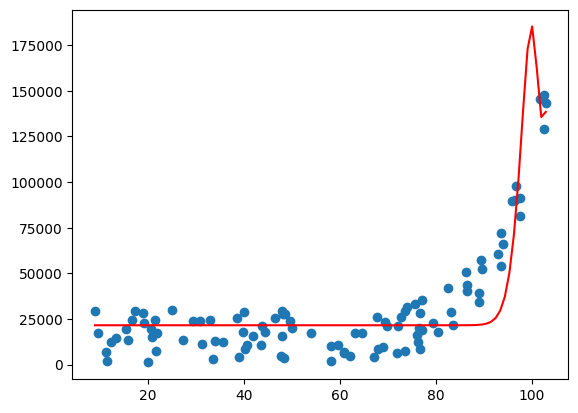

In [ ]:
xx_100d = transformation.transform(xx)
yy_100d = poly_100d.predict(xx_100d)
plt.scatter(X.x, y)
plt.plot(xx, yy_100d, c='r')

In [ ]:
score_100 =poly_100d.score(X_100, y)
score_100

0.7924620004439387

## 3. То же самое проделайте с датасетом для классификации и "King county".

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
data.head()

,x1,x2,y
0,0.048289,0.267592,1
1,1.363151,0.171123,0
2,-0.424253,0.893937,0
3,0.112344,0.565672,0
4,-1.262453,0.521735,0


In [ ]:
y = data.y
X = data.drop(["y"], axis=1)

In [ ]:
start = time.time()
class_transform = PolynomialFeatures(degree=5, include_bias=False)
time_log_5d = time.time() - start
X_5 = class_transform.fit_transform(X)

In [ ]:
class_5 = LogisticRegression().fit(X_5, y)

In [ ]:
log_score5 = class_5.score(X_5, y)
log_score5

0.916

In [ ]:
start = time.time()
class_transform = PolynomialFeatures(degree=10, include_bias=False)
time_log_10d = time.time() - start
X_10 = class_transform.fit_transform(X)

In [ ]:
class_10 = LogisticRegression().fit(X_10, y)

In [ ]:
log_score10 = class_10.score(X_10, y)
log_score10

0.924

In [ ]:
start = time.time()
class_transform = PolynomialFeatures(degree=100, include_bias=False)
time_log_100d = time.time() - start
X_100 = class_transform.fit_transform(X)

In [ ]:
class_100 = LogisticRegression().fit(X_100, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
log_score100 = class_100.score(X_100, y)
log_score100

0.5

In [ ]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

In [ ]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.699747189010915

In [ ]:
X_5_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=5)).fit_transform(X_kc_prices)

In [ ]:
reg_poly5_kc = LinearRegression().fit(X_5_kc_prices, y_kc_prices)
reg_poly5_kc.score(X_5_kc_prices, y_kc_prices)

## 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [ ]:
prof = {'gen_regression5':[time_poly_5d, score_5],
         'gen_regression10':[time_poly_10d, score_10],
         'gen_regression100':[time_poly_100d, score_100],
         'gen_classiffication5':[time_log_5d, score_5],
         'gen_classiffication10':[time_log_10d, score_10],
         'gen_classiffication100':[time_log_100d, score_100]
         }
pd.DataFrame(prof, index=['Время', 'Score'])

,gen_regression5,gen_regression10,gen_regression100,gen_classiffication5,gen_classiffication10,gen_classiffication100
Время,0.002655,0.002747,0.008580,0.000180,0.000141,0.000178
Score,0.921748,0.923200,0.792462,0.921748,0.923200,0.792462


## 5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [133]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [134]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
X_kc_prices.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [124]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.699747189010915

In [125]:
reg_kc_multiple.coef_, reg_kc_multiple.intercept_

(array([-3.57665414e+04,  4.11442785e+04,  1.10442865e+02,  1.28597869e-01,
         6.68955012e+03,  5.82960458e+05,  5.28709424e+04,  2.63856491e+04,
         9.58904452e+04,  7.07852244e+01,  3.96576400e+01, -2.62022321e+03,
         1.98125837e+01, -5.82419866e+02,  6.02748226e+05, -2.14729828e+05,
         2.16814005e+01, -3.82641850e-01]),
 6690324.603102473)

In [136]:
coef = np.hstack((reg_kc_multiple.intercept_, reg_kc_multiple.coef_))
coef

array([ 6.69032460e+06, -3.57665410e+04,  4.11442790e+04,  1.10443000e+02,
        1.29000000e-01,  6.68955000e+03,  5.82960458e+05,  5.28709420e+04,
        2.63856490e+04,  9.58904450e+04,  7.07850000e+01,  3.96580000e+01,
       -2.62022300e+03,  1.98130000e+01, -5.82420000e+02,  6.02748226e+05,
       -2.14729828e+05,  2.16810000e+01, -3.83000000e-01])

In [138]:
coeff = {'Coefficients':coef}

round(pd.DataFrame(coeff, index=['bias','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']), 3)

,Coefficients
bias,6690324.603
bedrooms,-35766.541
bathrooms,41144.279
sqft_living,110.443
sqft_lot,0.129
floors,6689.550
waterfront,582960.458
view,52870.942
condition,26385.649
grade,95890.445


## 6. Попробуйте также проинтерпретировать полиномиальную модель.

**Полиномиальная модель позволяет выделять нелинейную зависимость**